<a href="https://colab.research.google.com/github/Bhavu2542000/fuzzylogic/blob/main/Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=78cfaa74c3c1144d8b0f6b560563a6b6314b484f9a62d5975a3a5a10b55e6228
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
# Define input variables
obstacle_proximity = ctrl.Antecedent(np.arange(0, 101, 1), 'obstacle_proximity')
desired_direction = ctrl.Antecedent(np.arange(-90, 91, 1), 'desired_direction')
speed = ctrl.Antecedent(np.arange(0, 101, 1), 'speed')

# Define output variable
steering_angle = ctrl.Consequent(np.arange(-90, 91, 1), 'steering_angle')

# Define membership functions for input variables
obstacle_proximity['near'] = fuzz.trimf(obstacle_proximity.universe, [0, 0, 50])
obstacle_proximity['medium'] = fuzz.trimf(obstacle_proximity.universe, [0, 50, 100])
obstacle_proximity['far'] = fuzz.trimf(obstacle_proximity.universe, [50, 100, 100])

desired_direction['left'] = fuzz.trimf(desired_direction.universe, [-90, -90, 0])
desired_direction['straight'] = fuzz.trimf(desired_direction.universe, [-45, 0, 45])
desired_direction['right'] = fuzz.trimf(desired_direction.universe, [0, 90, 90])

speed['slow'] = fuzz.trimf(speed.universe, [0, 0, 50])
speed['medium'] = fuzz.trimf(speed.universe, [0, 50, 100])
speed['fast'] = fuzz.trimf(speed.universe, [50, 100, 100])

# Define membership functions for output variable
steering_angle['hard_left'] = fuzz.trimf(steering_angle.universe, [-90, -90, -45])
steering_angle['left'] = fuzz.trimf(steering_angle.universe, [-90, -45, 0])
steering_angle['straight'] = fuzz.trimf(steering_angle.universe, [-45, 0, 45])
steering_angle['right'] = fuzz.trimf(steering_angle.universe, [0, 45, 90])
steering_angle['hard_right'] = fuzz.trimf(steering_angle.universe, [45, 90, 90])

# Define fuzzy rules
rule1 = ctrl.Rule(obstacle_proximity['near'] & desired_direction['left'], steering_angle['hard_left'])
rule2 = ctrl.Rule(obstacle_proximity['medium'] & speed['fast'], steering_angle['straight'])
# Define more rules as needed...

# Create fuzzy control system
navigation_ctrl = ctrl.ControlSystem([rule1, rule2])
navigation = ctrl.ControlSystemSimulation(navigation_ctrl)

# Set input values
navigation.input['obstacle_proximity'] = 30
navigation.input['desired_direction'] = -30
navigation.input['speed'] = 70

# Compute output
navigation.compute()

# Print output
print("Steering Angle:", navigation.output['steering_angle'])

Steering Angle: -21.489104116222805


In [ ]:
!pip install numpy scikit-fuzzy matplotlib

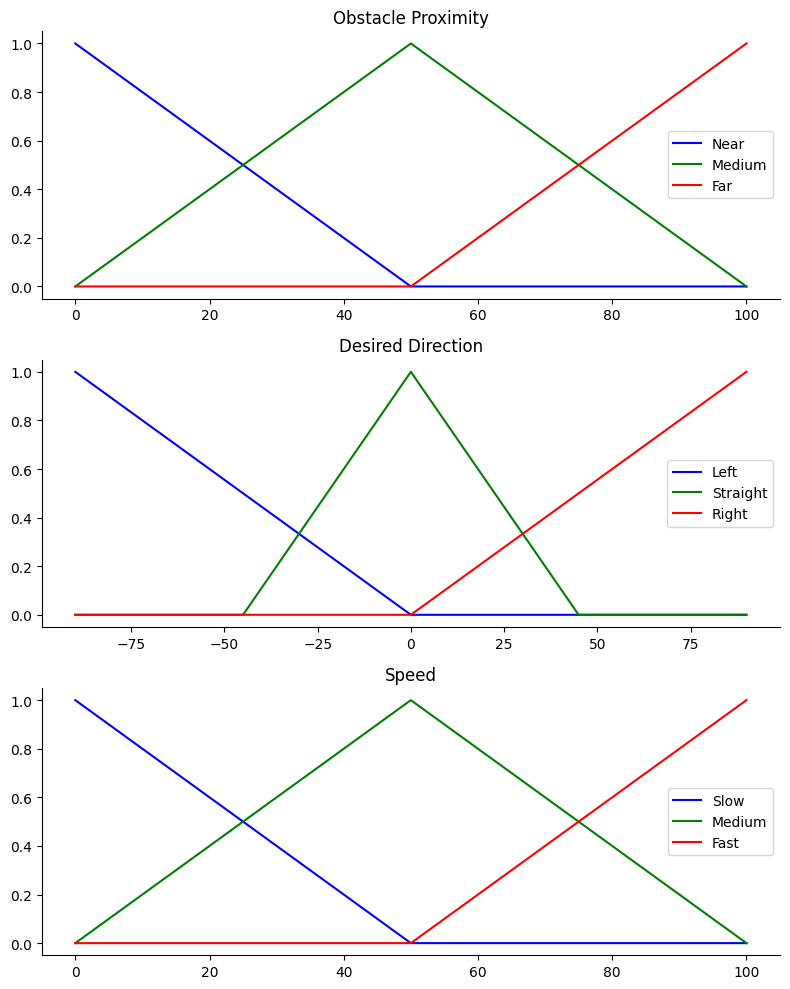

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Define input variables
obstacle_proximity = np.arange(0, 101, 1)
desired_direction = np.arange(-90, 91, 1)
speed = np.arange(0, 101, 1)

# Define membership functions for input variables
obstacle_proximity_near = fuzz.trimf(obstacle_proximity, [0, 0, 50])
obstacle_proximity_medium = fuzz.trimf(obstacle_proximity, [0, 50, 100])
obstacle_proximity_far = fuzz.trimf(obstacle_proximity, [50, 100, 100])

desired_direction_left = fuzz.trimf(desired_direction, [-90, -90, 0])
desired_direction_straight = fuzz.trimf(desired_direction, [-45, 0, 45])
desired_direction_right = fuzz.trimf(desired_direction, [0, 90, 90])

speed_slow = fuzz.trimf(speed, [0, 0, 50])
speed_medium = fuzz.trimf(speed, [0, 50, 100])
speed_fast = fuzz.trimf(speed, [50, 100, 100])

# Visualize membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 10))

ax0.plot(obstacle_proximity, obstacle_proximity_near, 'b', linewidth=1.5, label='Near')
ax0.plot(obstacle_proximity, obstacle_proximity_medium, 'g', linewidth=1.5, label='Medium')
ax0.plot(obstacle_proximity, obstacle_proximity_far, 'r', linewidth=1.5, label='Far')
ax0.set_title('Obstacle Proximity')
ax0.legend()

ax1.plot(desired_direction, desired_direction_left, 'b', linewidth=1.5, label='Left')
ax1.plot(desired_direction, desired_direction_straight, 'g', linewidth=1.5, label='Straight')
ax1.plot(desired_direction, desired_direction_right, 'r', linewidth=1.5, label='Right')
ax1.set_title('Desired Direction')
ax1.legend()

ax2.plot(speed, speed_slow, 'b', linewidth=1.5, label='Slow')
ax2.plot(speed, speed_medium, 'g', linewidth=1.5, label='Medium')
ax2.plot(speed, speed_fast, 'r', linewidth=1.5, label='Fast')
ax2.set_title('Speed')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()
